# Задача 1. Разведочный анализ

* **Дедлайн**: 08.10.2023, 23:59
* **Основной полный балл**: 5
* **Максимум баллов**: 10

## Задача

- [x] Самостоятельно скачать данные (из открытых источников по интересующей тематике, на сайте [kaggle](https://www.kaggle.com), [UCI](https://archive.ics.uci.edu/ml/datasets.php) репозитория, [Google Dataset Search](https://datasetsearch.research.google.com/) и др.). Для полного балла нужно выбрать данные, в которых есть пропущенные значения.
- [x] Считать данные и вывести их основные характеристики, описание признаков.
- [x] Сформулировать задачу предсказания, какой признак интересно было бы предсказывать по остальным.
- [x] (+2 балла) Произвести чистку данных (**Data Cleaning**). Например, заполнить пропущенные значения чем то осмысленным для поставленной задачи.
- [x] Провести анализ признаков, используя визуализацию (**hist(), boxplot(), countplot(), barplot()** и тд), сделать выводы, которые могут быть полезны при дальнейшем решении задачи предсказания.
- [x] (+1 балл) Оценить зависимость между признаками (визуализация или построение матрицы корреляции).
- [x] (+2 балла) Выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные если это нужно), убрать ненужные признаки, создать новые (**Feature Engineering**).

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

## Датасет

Датасет содержит характеристики различных автомобилей. Интересно уметь предсказывать стоимость автомобиля по этим характеристикам.

### Признаки:

- symboling - рейтинг страхового риска
- normalized-losses - относительная средняя выплата за ущерб за год страхования транспортного средства
- make - производитель
- fuel-type - тип топлива
- aspiration - наличие модификации для улучшения аспирацим двигателя
- num-of-doors - количество дверей
- body-style - тип автомобиля
- drive-wheels - тип привода
- engine-location - расположение двигателя
- wheel-base - длина колёсной базы (расстояние между передней и задней осями автомобиля)
- length - длина автомобиля
- width - ширина автомобиля
- height - высота автомобиля
- curb-weight - вес автомобиля (без пассажиров и багажа)
- engine-type - тип двигателя
- num-of-cylinders - количество цилиндров
- engine-size - объём двигателя
- fuel-system - топливная система
- bore - диаметр цилиндра
- stroke - полный ход поршня по цилиндру в любом направлении
- compression-ratio - коэффициент сжатия
- horsepower - количество лошадиных сил
- peak-rpm - пиковые обороты в минуту
- city-mpg - расход в городе (миль/галон)
- highway-mpg - расход на трассе (миль/галон)

Целевой признак -- price (цена)


## Анализ

In [120]:
df = pd.read_csv('Automobile_data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Пропущенные здачения в датасете отмечены символом '?', поэтому для удобной работы с ним заменим такие значения на np.nan

In [121]:
df.replace('?', np.nan, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Преобразуем числовые типы

In [122]:
df['normalized-losses']=df['normalized-losses'].astype(float)
df['bore']=df['bore'].astype(float)
df['stroke']=df['stroke'].astype(float)
df['horsepower']=df['horsepower'].astype(float)
df['peak-rpm']=df['peak-rpm'].astype(float)
df['price']=df['price'].astype(float)

Определим, какие значения можно подставить на место неизвестных у признака num-of-doors

In [123]:
df[df['num-of-doors'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


Посмотрим на характеристики других седан-ов от этих производителей

In [124]:
df[(df['body-style']=='sedan')  & ((df['make']=='dodge') | (df['make']=='mazda'))]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
25,1,148.0,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,6692.0
26,1,148.0,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,7609.0
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
53,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6695.0
54,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.08,3.15,9.0,68.0,5000.0,31,38,7395.0
60,0,115.0,mazda,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,8495.0
62,0,115.0,mazda,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,10245.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0
65,0,118.0,mazda,gas,std,four,sedan,rwd,front,104.9,...,140,mpfi,3.76,3.16,8.0,120.0,5000.0,19,27,18280.0
66,0,NaN,mazda,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72.0,4200.0,31,39,18344.0


У седанов Mazda и Dodge всегда по 4 двери, поэтому подставляем это значение

In [125]:
df["num-of-doors"].replace(np.nan, "four", inplace=True)

Попробуем заполнить пропущенные значения в столбце признака 'normalized-losses'.

In [126]:
df[df['normalized-losses'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
14,1,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,20,25,24565.0
15,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0
16,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
17,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0


In [127]:
df.corrwith(df['normalized-losses'])

symboling            0.528667
normalized-losses    1.000000
wheel-base          -0.074362
length               0.023220
width                0.105073
height              -0.432335
curb-weight          0.119893
engine-size          0.167365
bore                -0.036167
stroke               0.065627
compression-ratio   -0.132654
horsepower           0.295772
peak-rpm             0.264597
city-mpg            -0.258502
highway-mpg         -0.210768
price                0.203254
dtype: float64

Обратим внимание, что этот признак не коррелирует почти ни с одним количественным признаком, поэтому вместо неизвестных значений здесь имеет смысл подставить медиану из имеющихся значений.

<Axes: xlabel='normalized-losses', ylabel='Density'>

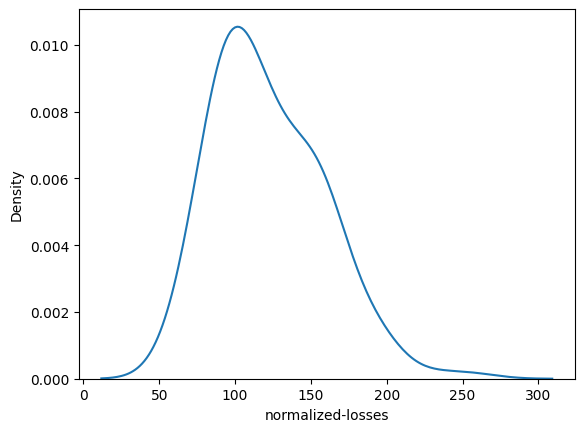

In [128]:
sns.kdeplot(df['normalized-losses'], bw=0.5)

In [129]:
median = df['normalized-losses'].median()
df["normalized-losses"].replace(np.nan, median, inplace=True)

Выбросим сущности, у которых неизвестен целевой признак price.

In [130]:
df.dropna(subset=["price"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

Рассмотрим корреляцию между признаками.

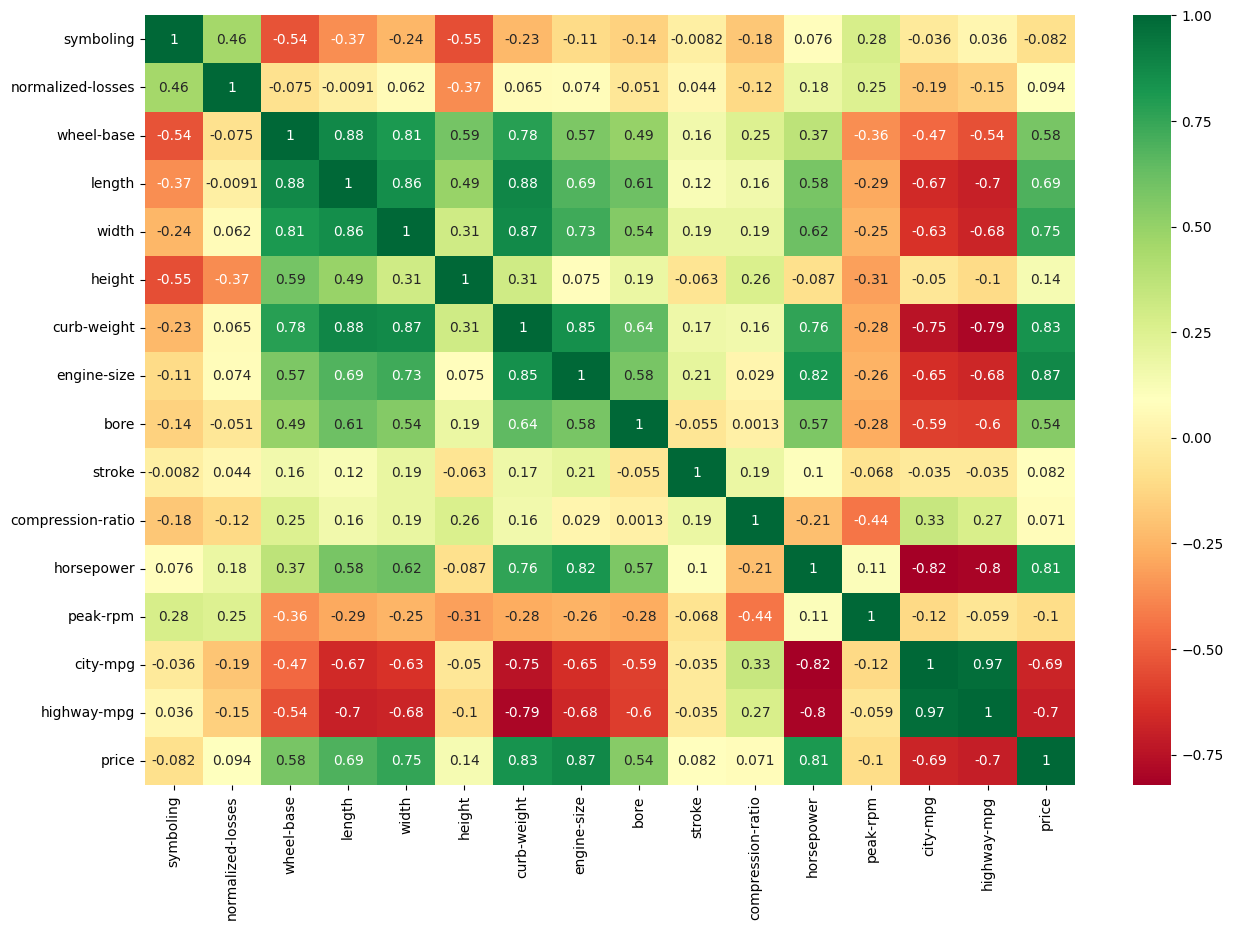

In [131]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

Интересно, что symboling почти не коррелирует с ценой, ведь логично было бы предположить, цена авто зависит от индекса страхового риска. Однако это оказалось не так.

Стоит отметить, что некоторые параметры двигателя (engine size, bore, horsepower) существенно влияют на цену. Однако параметры двигателя stroke и compression-ratio слабо коррелирует с другими признаками, в том числе и с целевым.

Также заметна очень высокая корреляция между highway-mpg и city-mpg, поэтому один из них можно убрать.

In [132]:
df.drop(columns=['city-mpg'], inplace=True)

Рассмотрим статистику цены у разных производетелей.

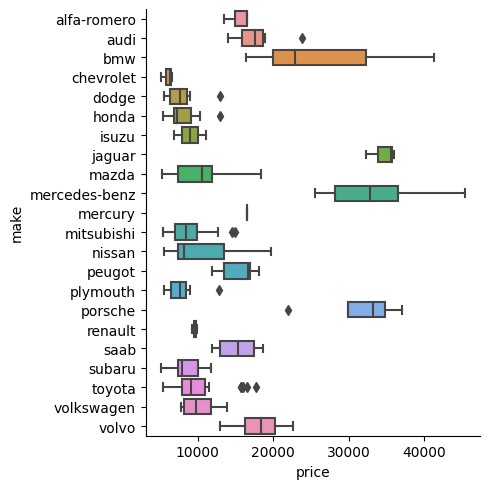

In [133]:
#plt.figure(figsize=(15,100))
sns.catplot(y="make", x="price", kind="box", data=df)

Хорошо заметно, что машины Porche, BMW, Jaguar и Mersedes значительно дороже всех остальных. Самая дорогая машина от производителя Mersedes. У большинства остальных производителей разборс цены довольно схож, и можно выделить два класса: самые бюджетные (chevrolet, dodge, honda, ...) и среднебюджетные (alfa-romero, audi, peugot, ...)

Рассмотрим распределение рейтинга страхового риска. Большинство машин имеют неотрицательный рейтинг.

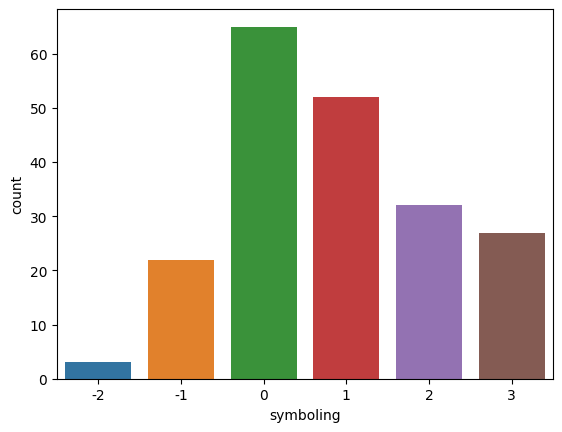

In [134]:
sns.countplot(df, x='symboling');

Посмотрим на зависимость мощности двигателя от его размера.

<Axes: xlabel='horsepower', ylabel='engine-size'>

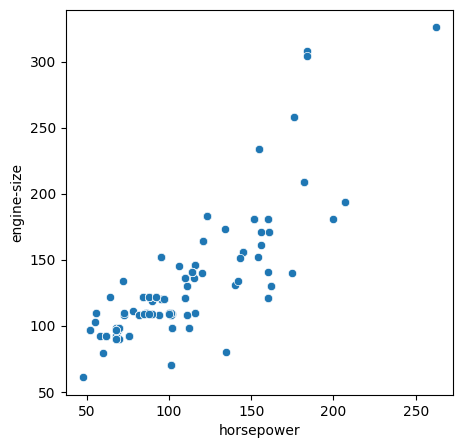

In [135]:
plt.figure(figsize = (5,5))
sns.scatterplot(x='horsepower', y='engine-size', data = df)

Рассмотрим зависимость мощности двигателя от типа топлива и наличия турбокомпрессора.

<Axes: xlabel='fuel-type', ylabel='horsepower'>

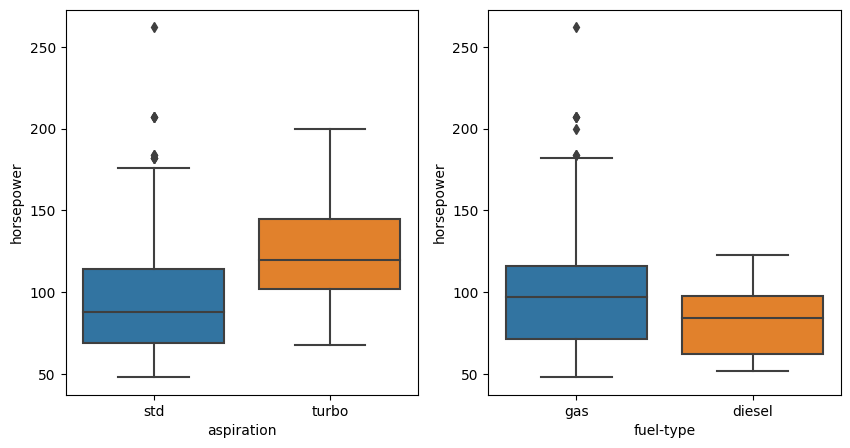

In [136]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.boxplot(x='aspiration', y='horsepower', data = df)
plt.subplot(1,2,2)
sns.boxplot(x='fuel-type', y='horsepower', data = df)

Ожидаемо, что наличие турбокомпресора увеличивает мощность. Также интересно, что бензиновыые автомобили в большинстве случаев мощнее дизельных.

Также посмотрим на соотношение количества атомобилей с этими модификациями, а также соотношение цен.

<Axes: xlabel='fuel-type', ylabel='price'>

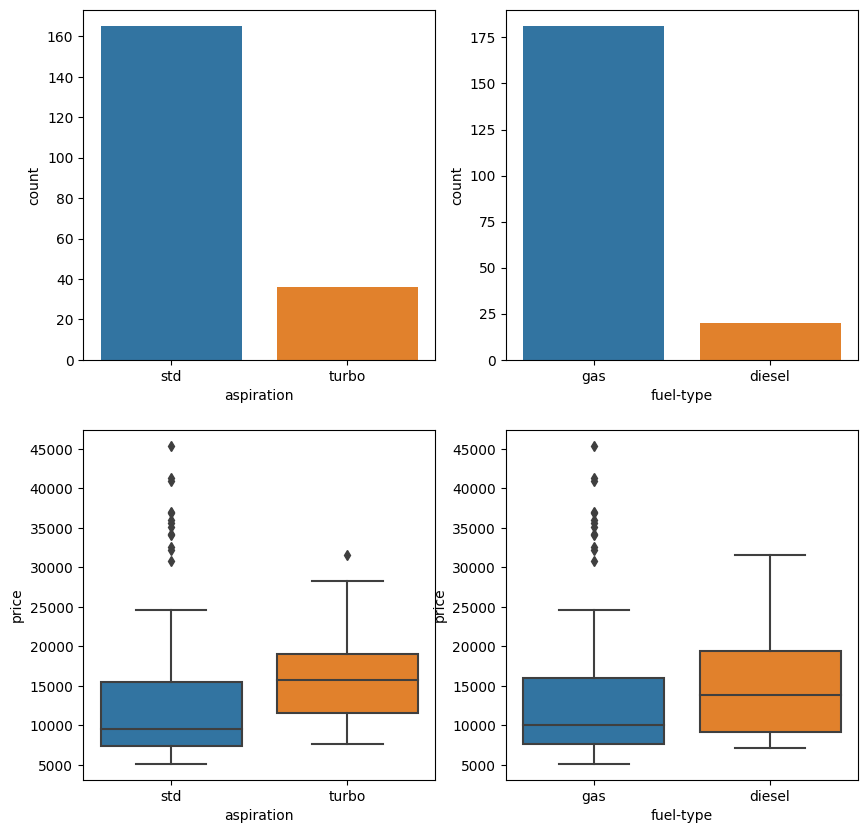

In [137]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.countplot(df,x='aspiration')
plt.subplot(2,2,2)
sns.countplot(df,x='fuel-type')
plt.subplot(2,2,3)
sns.boxplot(x='aspiration', y='price', data = df)
plt.subplot(2,2,4)
sns.boxplot(x='fuel-type', y='price', data = df)

Интересно, что хоть дизельные автомобили несколько менее мощные чем бензиновые, цена на них выше. Возможно, по этой причине в даннм датасете их значительно меньше, чем бензиновых.

Рассмотрим зависимость цены от типа шасси. Интересно, что заднеприводные машины почти как правило в два раза дороже чем переднеприводные. Возможно, это связано с усложненной конструкцией таких машин. Также интересно, что полноприводные оказались не намного дороже переднеприводных.

<Axes: xlabel='drive-wheels', ylabel='price'>

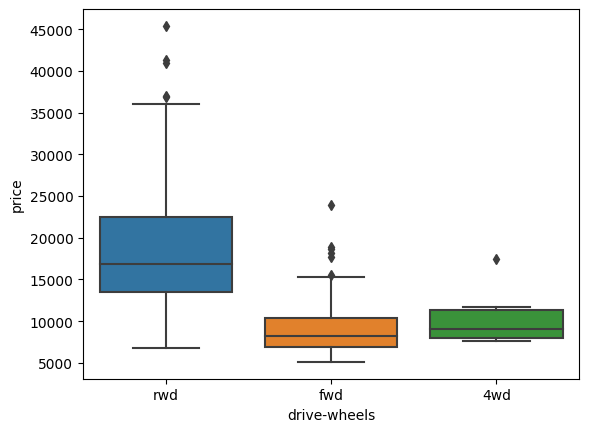

In [138]:
sns.boxplot(x='drive-wheels', y='price', data = df)

Теперь посмотрим на зависимости цены от различных числовых признаков.

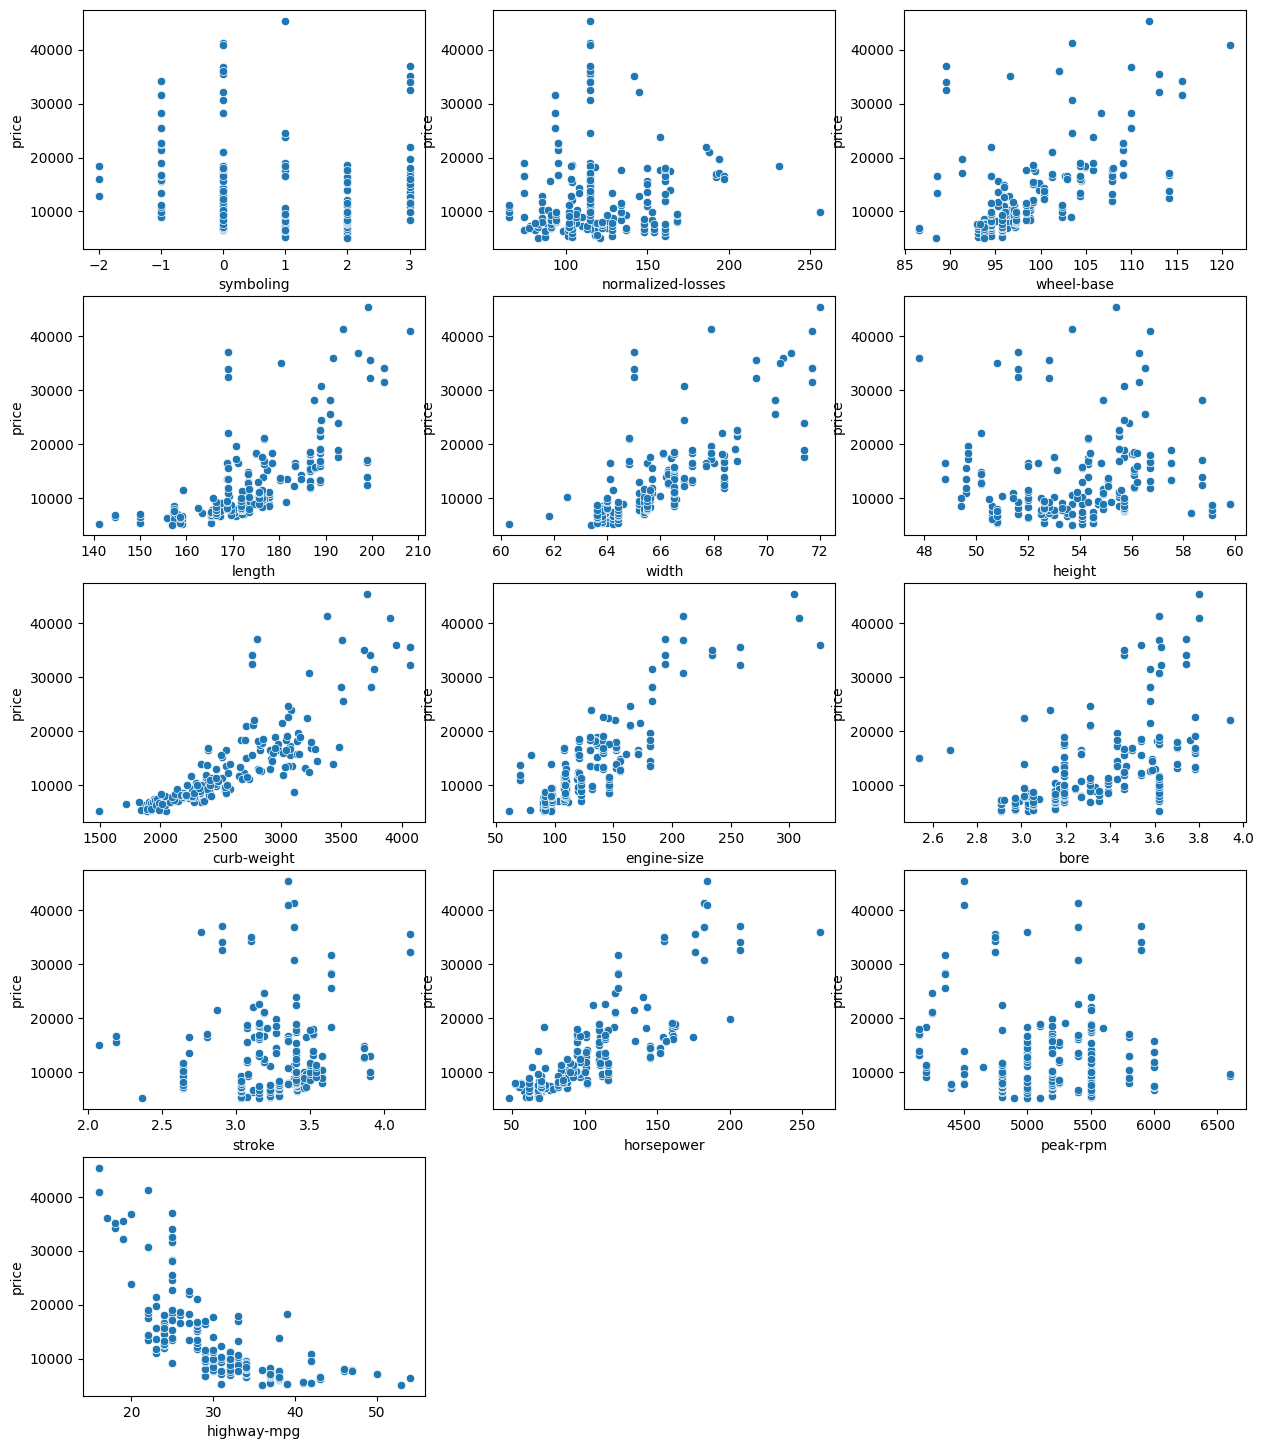

In [139]:
numerical = ['symboling','normalized-losses','wheel-base','length','width','height',
             'curb-weight','engine-size','bore','stroke',
             'horsepower','peak-rpm', 'highway-mpg']

fig = plt.figure(figsize = [15, 18])
for i in enumerate(numerical):
    plt.subplot(5, 3, i[0] + 1)
    sns.scatterplot(x=i[1], y='price', data=df)

Можно отметить несколько фактов: например, мощность большинства дешёвых машин не превышает 120 лошадиных сил. Похожее справедливо и для размера двигателя: более дешёвые машины имеют меньший двигатель. Также стоимость машины почти не связана с её выстотой: есть как низкие дорогие машины, так и дешёвые высокие.

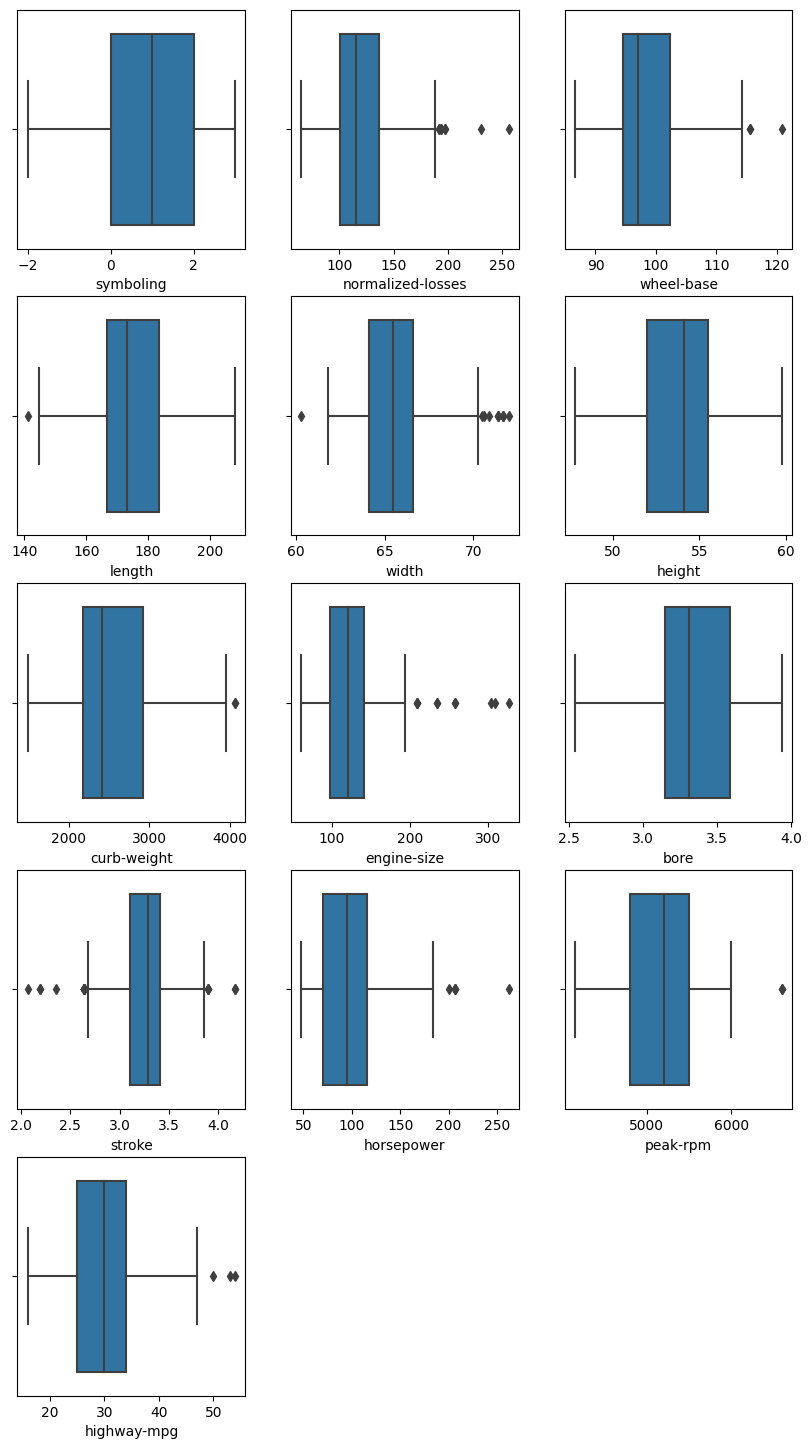

In [140]:
fig = plt.figure(figsize = [10, 18])
for i in enumerate(numerical):
    plt.subplot(5, 3, i[0] + 1)
    sns.boxplot(x=i[1], data = df )